In [3]:
import altair as alt
import pandas as pd

In [7]:
data = pd.read_csv('csv_teste.csv', sep = ';', encoding = 'latin1', usecols = ['city', 'value'] )
data.head()

,city,value
0,Adamantina,"0,608580756"
1,Adolfo,"0,911021583"
2,Aguaí,"0,343237536"
3,Águas da Prata,"0,039917193"
4,Águas de Lindoia,"0,561672559"


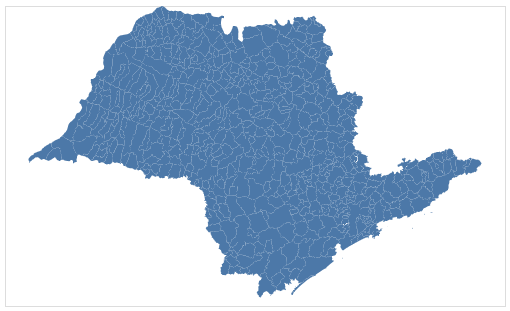

In [9]:
sp = alt.topo_feature('geojs-35-mun.json', 'geojs-35-mun')
alt.Chart(sp).mark_geoshape().encode(
).properties(
    width=500,
    height=300
)

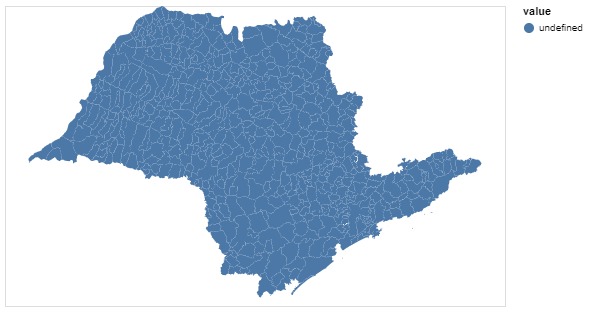

In [12]:
sp = alt.topo_feature('geojs-35-mun.json', 'geojs-35-mun')
alt.Chart(sp).mark_geoshape().encode(
    color= 'value:N'
).transform_lookup(
    lookup='value',
    from_=alt.LookupData(data,'city')
).properties(
    width=500,
    height=300
)

In [15]:
data2 = pd.read_csv('washington-csv.csv', sep = ';')
data2.head()

,city,value
0,Adams,"0,495290392"
1,Asotin,"0,14383386"
2,Benton,"0,42505347"
3,Chelan,"0,512836767"
4,Clallam,"0,245212711"


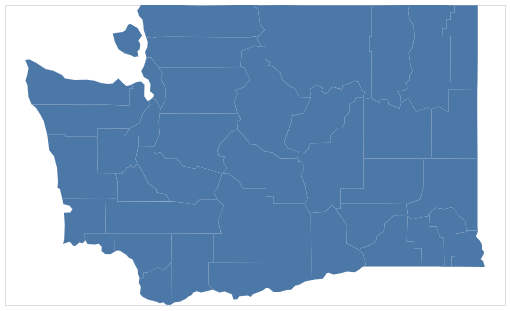

In [16]:
wash = alt.topo_feature('washington-topojson.json', 'cb_2015_washington_county_20m')
alt.Chart(wash).mark_geoshape().encode(
).properties(
    width=500,
    height=300
)

In [31]:
wash = alt.topo_feature('washington-topojson.json', 'cb_2015_washington_county_20m')
alt.Chart(wash).mark_geoshape().encode(
    color = 'value:Q'
).properties(
    width=500,
    height=300
).transform_lookup(
    lookup = 'value',
    from_ = alt.LookupData(data2, key = 'NAME', fields = ['value']),
    default = 'null'
)

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


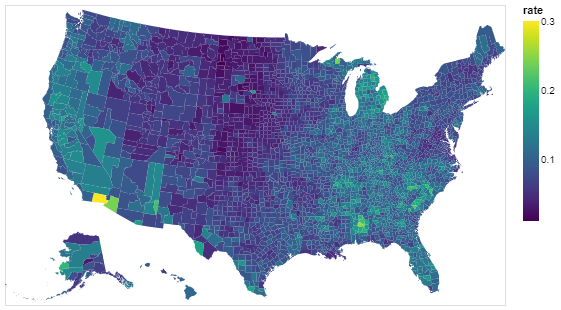

In [20]:
from vega_datasets import data
counties = alt.topo_feature(data.us_10m.url, 'counties')
source = data.unemployment.url

alt.Chart(counties).mark_geoshape().encode(
    color='rate:Q'
).transform_lookup(
    lookup='id',
    from_=alt.LookupData(source, 'id', ['rate'])
).project(
    type='albersUsa'
).properties(
    width=500,
    height=300
)

In [21]:
data2['NAME'] = data2.city

In [23]:
data2.drop('city', inplace = True, axis = 1)
data2.head()

,value,NAME
0,"0,495290392",Adams
1,"0,14383386",Asotin
2,"0,42505347",Benton
3,"0,512836767",Chelan
4,"0,245212711",Clallam


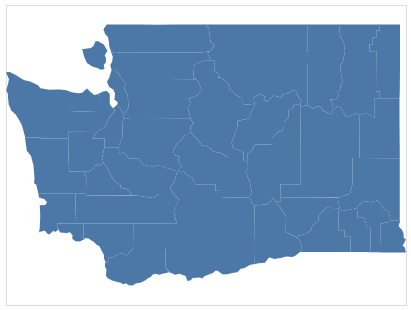

In [25]:
wash = alt.topo_feature('washington-topojson.json', 'cb_2015_washington_county_20m')
alt.Chart(wash).mark_geoshape().encode(
).transform_lookup(
    lookup = 'value',
    from_ = alt.LookupData(data2, 'NAME', ['value'])
)

In [26]:
type(source)

str

In [27]:
source

'https://vega.github.io/vega-datasets/data/unemployment.tsv'

In [32]:
'washington-csv.csv'

'washington-csv.csv'

In [33]:
f = open('washington-csv.csv', 'r')
t = f.read()

In [34]:
t

'city;value\nAdams;0,495290392\nAsotin;0,14383386\nBenton;0,42505347\nChelan;0,512836767\nClallam;0,245212711\nClark;0,790317256\nColumbia;0,342618478\nCowlitz;0,88242061\nDouglas;0,687666592\nFerry;0,722497647\nFranklin;0,884608192\nGarfield;0,653044477\nGrant;0,465136906\nGrays Harbor;0,025262565\nIsland;0,740207518\nJefferson;0,382863803\nKing;0,725822775\nKitsap;0,976177525\nKittitas;0,191262171\nKlickitat;0,867847001\nLewis;0,209293241\nLincoln;0,087836669\nMason;0,826124151\nOkanogan;0,630304032\nPacific;0,423439709\nPend Oreille;0,997627092\nPierce;0,53998968\nSan Juan;0,56479564\nSkagit;0,111721186\nSkamania;0,399399187\nSnohomish;0,295129627\nSpokane;0,848496676\nStevens;0,897185778\nThurston;0,894110682\nWahkiakum;0,043715822\nWalla Walla;0,046054641\nWhatcom;0,217929602\nWhitman;0,357905534\nYakima;0,492850867\n'

In [35]:
wash = alt.topo_feature('washington-topojson.json', 'cb_2015_washington_county_20m')
alt.Chart(wash).mark_geoshape().encode(
    color = 'value:Q'
).properties(
    width=500,
    height=300
).transform_lookup(
    lookup = 'value',
    from_ = alt.LookupData(t, key = 'NAME', fields = ['value']),
    default = 'null'
)

<VegaLite 2 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [36]:
t

'city;value\nAdams;0,495290392\nAsotin;0,14383386\nBenton;0,42505347\nChelan;0,512836767\nClallam;0,245212711\nClark;0,790317256\nColumbia;0,342618478\nCowlitz;0,88242061\nDouglas;0,687666592\nFerry;0,722497647\nFranklin;0,884608192\nGarfield;0,653044477\nGrant;0,465136906\nGrays Harbor;0,025262565\nIsland;0,740207518\nJefferson;0,382863803\nKing;0,725822775\nKitsap;0,976177525\nKittitas;0,191262171\nKlickitat;0,867847001\nLewis;0,209293241\nLincoln;0,087836669\nMason;0,826124151\nOkanogan;0,630304032\nPacific;0,423439709\nPend Oreille;0,997627092\nPierce;0,53998968\nSan Juan;0,56479564\nSkagit;0,111721186\nSkamania;0,399399187\nSnohomish;0,295129627\nSpokane;0,848496676\nStevens;0,897185778\nThurston;0,894110682\nWahkiakum;0,043715822\nWalla Walla;0,046054641\nWhatcom;0,217929602\nWhitman;0,357905534\nYakima;0,492850867\n'